In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os
from pathlib import Path

# Setup

In [2]:
# create a path to the pokemon image directory
data_directory = os.path.join(os.getcwd(), 'data')
images_directory = os.path.join(data_directory, 'images/low-res')
images_path = Path(images_directory)
images_path

PosixPath('/Users/judith/code-projects/pokemastery-project/notebooks/data/images/low-res')

In [3]:
# create a dataframe with the name and filepath of each pokemon

files = list(images_path.glob('*.png')) # get the path of each file
names = [os.path.split(x)[1] for x in list(images_path.glob('*.png'))] # get the name of each file

image_df = pd.concat([pd.Series(names, name='Name'), pd.Series(files, name='Filepath').astype(str)], axis=1) # create a dataframe with the name and filepath of each pokemon
image_df['Name'] = image_df['Name'].str.replace('.png', '') # delete .png extension from name
image_df.head()

,Name,Filepath
0,parasect,/Users/judith/code-projects/pokemastery-projec...
1,lumineon,/Users/judith/code-projects/pokemastery-projec...
2,raikou,/Users/judith/code-projects/pokemastery-projec...
3,dedenne,/Users/judith/code-projects/pokemastery-projec...
4,pyroar,/Users/judith/code-projects/pokemastery-projec...


In [4]:
# load in csv with the name, primary type, and secondary type of each pokemon
csv_directory = os.path.join(data_directory, 'pokemon.csv')
label_df = pd.read_csv(csv_directory)
label_df.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [5]:
# merge image_df with label_df
df = image_df.merge(label_df, on='Name')
df.head()

,Name,Filepath,Type1,Type2
0,parasect,/Users/judith/code-projects/pokemastery-projec...,Bug,Grass
1,lumineon,/Users/judith/code-projects/pokemastery-projec...,Water,NaN
2,raikou,/Users/judith/code-projects/pokemastery-projec...,Electric,NaN
3,dedenne,/Users/judith/code-projects/pokemastery-projec...,Electric,Fairy
4,pyroar,/Users/judith/code-projects/pokemastery-projec...,Fire,Normal


In [6]:
# drop the Name and Type2 columns
df = df.drop(['Type2'], axis=1) 
df.head()

,Name,Filepath,Type1
0,parasect,/Users/judith/code-projects/pokemastery-projec...,Bug
1,lumineon,/Users/judith/code-projects/pokemastery-projec...,Water
2,raikou,/Users/judith/code-projects/pokemastery-projec...,Electric
3,dedenne,/Users/judith/code-projects/pokemastery-projec...,Electric
4,pyroar,/Users/judith/code-projects/pokemastery-projec...,Fire


# Exploratory data analysis

In [7]:
df['Type1'].unique()

array(['Bug', 'Water', 'Electric', 'Fire', 'Ice', 'Grass', 'Ghost',
       'Normal', 'Ground', 'Psychic', 'Dark', 'Dragon', 'Rock',
       'Fighting', 'Poison', 'Flying', 'Fairy', 'Steel'], dtype=object)

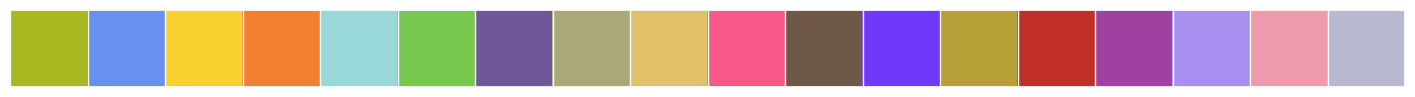

In [8]:
custom_colors = {
    'Bug': '#a8b820',
    'Water': '#6890f0',
    'Electric': '#f8d030',
    'Fire': '#f08030',
    'Ice': '#98d8d8',
    'Grass': '#78c850',
    'Ghost': '#705898',
    'Normal': '#a8a878',
    'Ground': '#e0c068',
    'Psychic': '#f85888',
    'Dark': '#705848',
    'Dragon': '#7038f8',
    'Rock': '#b8a038',
    'Fighting': '#c03028',
    'Poison': '#a040a0',
    'Flying': '#a890f0',
    'Fairy': '#ee99ac',
    'Steel': '#b8b8d0'
}
sns.set(font_scale=1.25) # Increase font size
sns.set_palette(sns.color_palette(custom_colors.values())) # Set custom color palette
sns.palplot(sns.color_palette(custom_colors.values()),size=1) # Plot custom color palette

In [9]:
pokemon_types = df['Type1'].unique() # get the unique types as a numpy array
types_counts = []
for pokemon_type in pokemon_types: # for each type
    types_counts.append(sum(df['Type1'] == pokemon_type)) # sum the number of pokemon with type == pokemon_type
df_types_count = pd.DataFrame({'Types':pokemon_types, 'Counts':types_counts}) # create a dataframe
df_types_count

,Types,Counts
0,Bug,63
1,Water,105
2,Electric,36
3,Fire,47
4,Ice,23
5,Grass,66
6,Ghost,23
7,Normal,93
8,Ground,30
9,Psychic,47


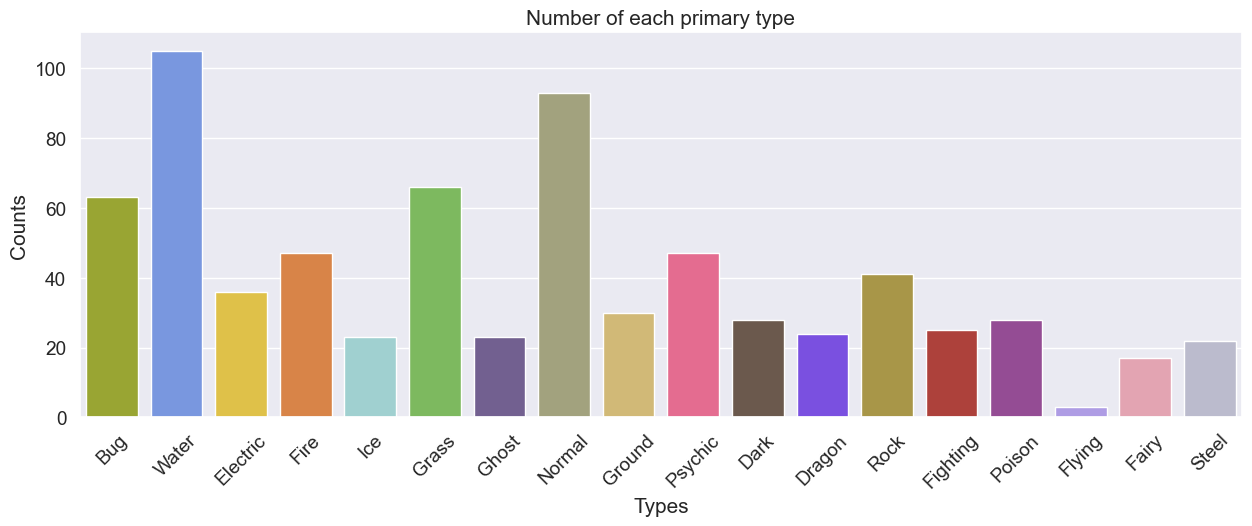

In [10]:
# plot number of each type of pokemon
plt.figure(figsize=(15,5))
plt.title('Number of each primary type')
ax = sns.barplot(x=df_types_count['Types'], y='Counts', data=df_types_count) # plot barplot
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="center") # rotate x-axis labels
plt.show()

In [11]:
# determine the indices of the first occurrance of each pokemon type
indices = df['Type1'].drop_duplicates().index
indices


Index([0, 1, 2, 4, 5, 7, 8, 9, 14, 15, 19, 31, 33, 36, 37, 40, 61, 166], dtype='int64')

In [12]:
df['Type1'].drop_duplicates().values

array(['Bug', 'Water', 'Electric', 'Fire', 'Ice', 'Grass', 'Ghost',
       'Normal', 'Ground', 'Psychic', 'Dark', 'Dragon', 'Rock',
       'Fighting', 'Poison', 'Flying', 'Fairy', 'Steel'], dtype=object)

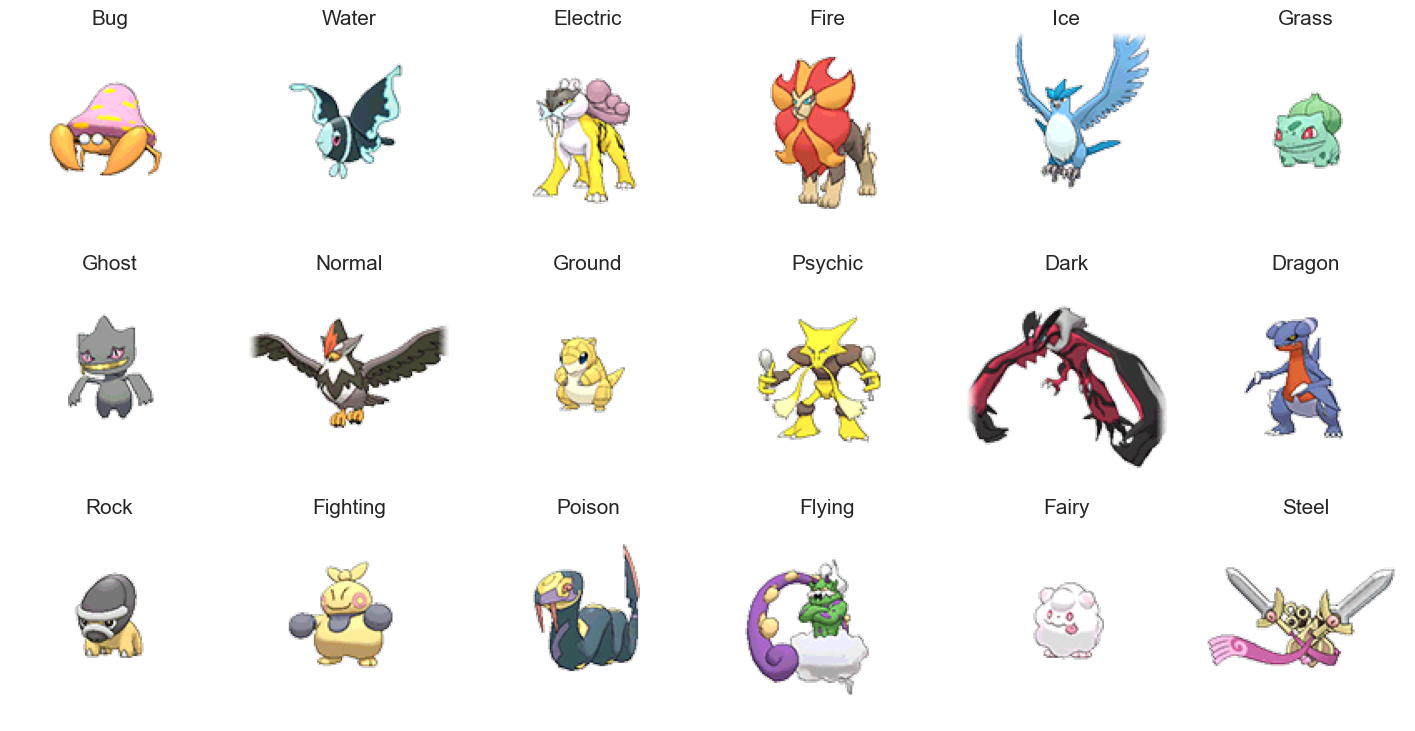

In [13]:
# obtain the image from the filepath at the determined indices
imgs = []
for index in indices:
    imgs.append(mpimg.imread(df.iat[index, 1]))

# output the images 
f, axarr = plt.subplots(3,6, figsize=(18,9)) # 3 rows, 6 columns
count = 0
for r in range(3):
  for c in range(6):
    axarr[r,c].imshow(imgs[count]) 
    axarr[r,c].set_title(pokemon_types[count])
    axarr[r,c].set_axis_off()
    count += 1 
plt.show()


In [14]:
# determine water indices
water_indices = df[df['Type1'] == 'Water'].index
water_indices


Index([  1,  17,  27,  28,  38,  42,  44,  53,  59,  62,
       ...
       690, 691, 698, 699, 704, 706, 709, 710, 716, 717],
      dtype='int64', length=105)

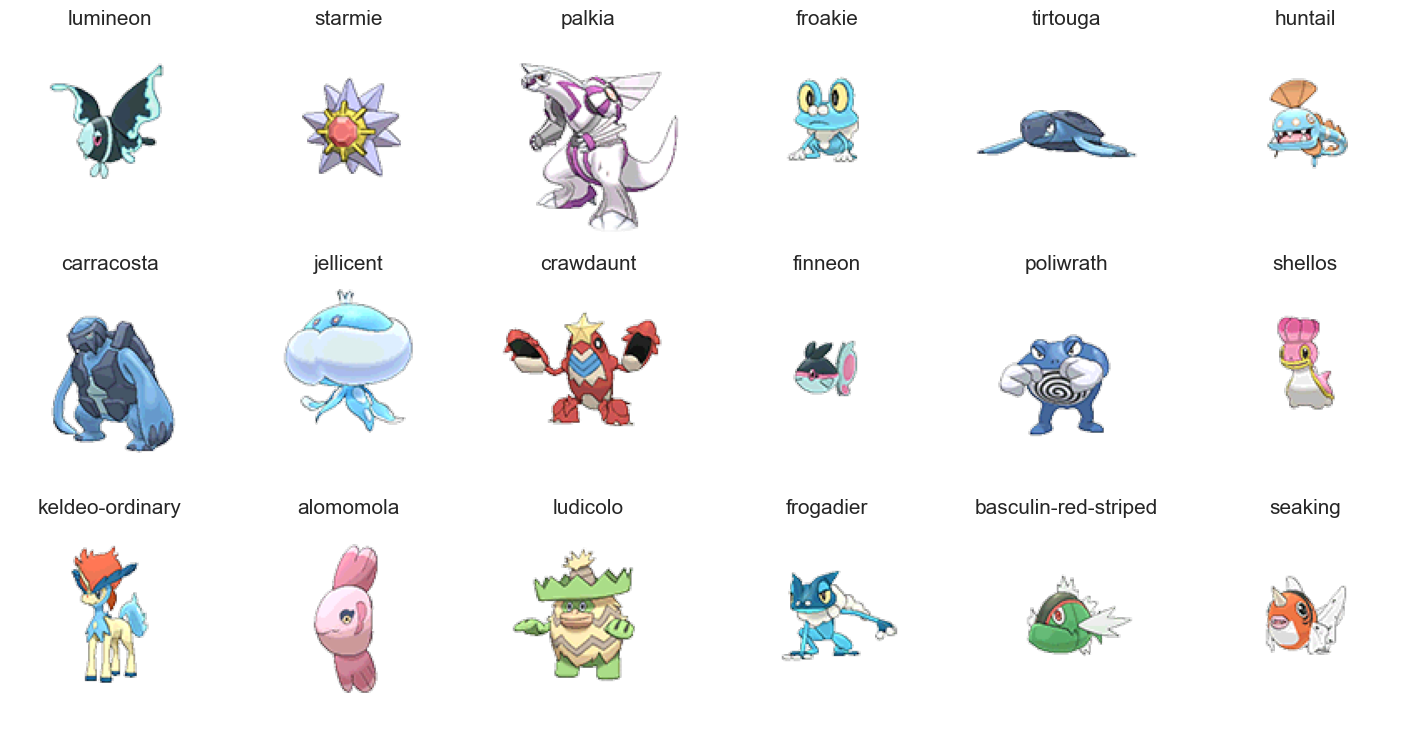

In [15]:
# obtain the image from the filepath at the determined indices
imgs = []
titles = []
for index in water_indices:
    imgs.append(mpimg.imread(df.iat[index, 1]))
    titles.append(df.iat[index, 0])

# output the images 
f, axarr = plt.subplots(3,6, figsize=(18,9)) # 3 rows, 6 columns
count = 0
for r in range(3):
  for c in range(6):
    axarr[r,c].imshow(imgs[count])
    axarr[r,c].set_title(titles[count])
    axarr[r,c].set_axis_off()
    count += 1 
plt.show()